<a href="https://colab.research.google.com/github/athulgr/skillcraft-intership/blob/main/skillccraft_tsk02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


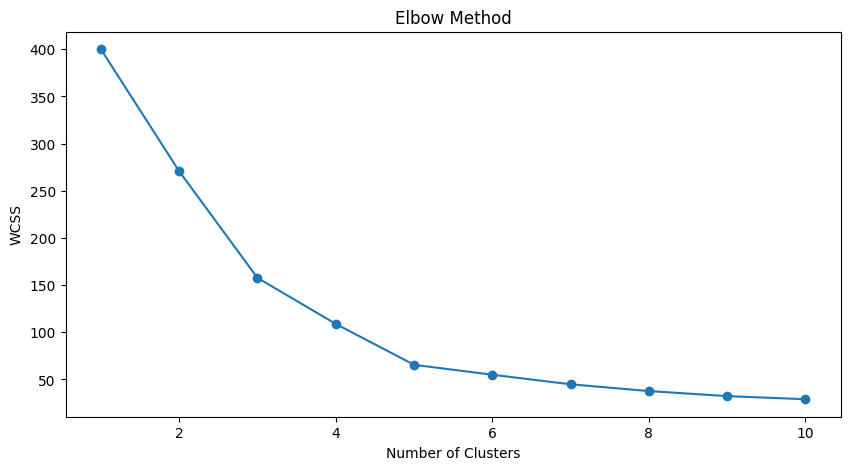

Silhouette Score: 0.4939069237513199


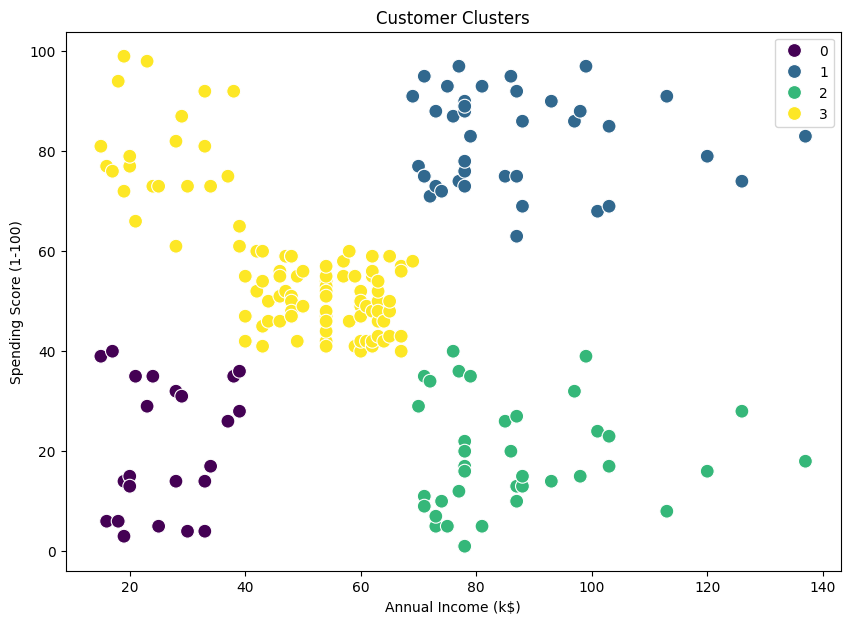

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset to check column names
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values for numeric columns with the mean
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Feature selection - Use actual column names from your dataset
features = ['Annual Income (k$)', 'Spending Score (1-100)']  # Replace with actual column names
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming we choose k=4 from the elbow method
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data[features[0]], y=data[features[1]], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

# New section